# Homework 2 - Berkeley STAT 157

# Name: Derek Topper (SID: 26861675)

Handout 1/29/2019, due 2/5/2019 by 4pm in Git by committing to your repository.

In [2]:
from mxnet import nd, autograd, gluon

# 1. Multinomial Sampling

Implement a sampler from a discrete distribution from scratch, mimicking the function `mxnet.ndarray.random.multinomial`. Its arguments should be a vector of probabilities $p$. You can assume that the probabilities are normalized, i.e. tha they sum up to $1$. Make the call signature as follows:

```
samples = sampler(probs, shape) 

probs   : An ndarray vector of size n of nonnegative numbers summing up to 1
shape   : A list of dimensions for the output
samples : Samples from probs with shape matching shape
```

Hints:

1. Use `mxnet.ndarray.random.uniform` to get a sample from $U[0,1]$.
1. You can simplify things for `probs` by computing the cumulative sum over `probs`.

In [5]:
def sampler(probs, shape):
    ## Add your codes here 
    Earlysamples = nd.random.uniform(0,1,shape)
    samples = nd.zeros(shape)
    indexX = 0
    for x in Earlysamples:
        indexY = 0
        for y in x:
            test = 0
            indexProbs = 0
            for each2 in probs:
                if y > test:
                    test += each2
                    if test > y:
                        samples[indexX][indexY] = indexProbs
                    indexProbs += 1
                else:
                    test += each2  
                    indexProbs += 1
            indexY += 1
        indexX += 1
    return samples

# a simple test
sampler(nd.array([0.2, 0.3, 0.5]), (2,3))


[[1. 1. 2.]
 [0. 2. 1.]]
<NDArray 2x3 @cpu(0)>

Note: I wasn't sure what you wanted here and I think mxnet.ndarray.random.multinomial returns the numbers rather than the actual probablilities. This can easily be changed if needed.

# 2. Central Limit Theorem

Let's explore the Central Limit Theorem when applied to text processing. 

* Download [https://www.gutenberg.org/ebooks/84](https://www.gutenberg.org/files/84/84-0.txt) from Project Gutenberg 
* Remove punctuation, uppercase / lowercase, and split the text up into individual tokens (words).
* For the words `a`, `and`, `the`, `i`, `is` compute their respective counts as the book progresses, i.e. 
    $$n_\mathrm{the}[i] = \sum_{j = 1}^i \{w_j = \mathrm{the}\}$$
* Plot the proportions $n_\mathrm{word}[i] / i$ over the document in one plot.
* Find an envelope of the shape $O(1/\sqrt{i})$ for each of these five words. (Hint, check the last page of the [sampling notebook](http://courses.d2l.ai/berkeley-stat-157/slides/1_24/sampling.pdf))
* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
* Why does it still work quite well?

In [6]:
filename = gluon.utils.download('https://www.gutenberg.org/files/84/84-0.txt')
with open(filename, encoding='utf-8') as f:
    book = f.read()
print(book[0:100])

## Add your codes here
import string
exclude = set(string.punctuation)
book = ''.join(ch for ch in book if ch not in exclude)
book = book.lower()
book = book.split(' ')
book = [i.split('\n') for i in book]
book = [j for i in book for j in i]
book = [x for x in book if x]
book = [i.split('\ufeff') for i in book]
book = [j for i in book for j in i]
book = [x for x in book if x]
#THIS IS SLOW
         
print(book[0:10])

﻿
Project Gutenberg's Frankenstein, by Mary Wollstonecraft (Godwin) Shelley

This eBook is for the u
['project', 'gutenbergs', 'frankenstein', 'by', 'mary', 'wollstonecraft', 'godwin', 'shelley', 'this', 'ebook']


In [7]:
bookCumSum = list(range(0, len(book)))

def cumsumWordCount(wordlist, word):
    index = 0
    word_count = 0
    for each in book:
        if each == word:
            word_count += 1
        wordlist[index] = word_count
        index += 1

# "and", "the", "i", "is"]
testA = nd.zeros(len(book)) 
cumsumWordCount(testA, "a")

testAND = nd.zeros(len(book)) 
cumsumWordCount(testAND, "and")

testTHE = nd.zeros(len(book)) 
cumsumWordCount(testTHE, "the")

testI = nd.zeros(len(book)) 
cumsumWordCount(testI, "i")

testIS = nd.zeros(len(book)) 
cumsumWordCount(testIS, "is")

C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


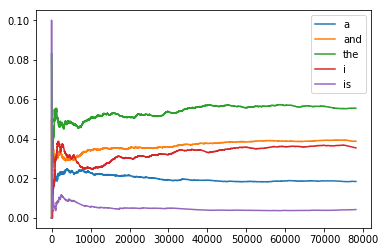

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(bookCumSum)
plt.plot(testA.asnumpy()/bookCumSum)
plt.plot(testAND.asnumpy()/bookCumSum)
plt.plot(testTHE.asnumpy()/bookCumSum)
plt.plot(testI.asnumpy()/bookCumSum)
plt.plot(testIS.asnumpy()/bookCumSum)
plt.legend(["a", "and", "the", "i", "is"])
plt.show()


In [65]:
mean = (testA.asnumpy()[len(book)-1]/(len(book)-1) +
testAND.asnumpy()[len(book)-1]/(len(book)-1) +
testTHE.asnumpy()[len(book)-1]/(len(book)-1) +
testI.asnumpy()[len(book)-1]/(len(book)-1) +
testIS.asnumpy()[len(book)-1]/(len(book)-1) ) / 5
print(mean)

means = [testA.asnumpy()[len(book)-1]/(len(book)-1),
testAND.asnumpy()[len(book)-1]/(len(book)-1),
testTHE.asnumpy()[len(book)-1]/(len(book)-1),
testI.asnumpy()[len(book)-1]/(len(book)-1),
testIS.asnumpy()[len(book)-1]/(len(book)-1)]

variance = ((testA.asnumpy()[len(book)-1]/(len(book)-1) - mean)**2 +
(testAND.asnumpy()[len(book)-1]/(len(book)-1)- mean)**2 +
(testTHE.asnumpy()[len(book)-1]/(len(book)-1)- mean)**2 +
(testI.asnumpy()[len(book)-1]/(len(book)-1)- mean)**2 +
(testIS.asnumpy()[len(book)-1]/(len(book)-1)- mean)**2 ) 
print(variance)

print(means)

0.0304606754524148
0.0015509305499532304
[0.018429579539196477, 0.03878024103174908, 0.05544242517385792, 0.03542475121988704, 0.004226380297383486]


C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':
C:\Users\Derek

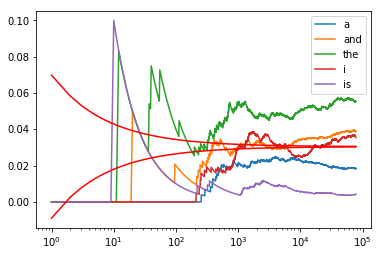

In [13]:
y = bookCumSum

plt.semilogx(y,testA.asnumpy()/bookCumSum)
plt.semilogx(y,testAND.asnumpy()/bookCumSum)
plt.semilogx(y,testTHE.asnumpy()/bookCumSum)
plt.semilogx(y,testI.asnumpy()/bookCumSum)
plt.semilogx(y,testIS.asnumpy()/bookCumSum)
plt.legend(["a", "and", "the", "i", "is"])

import numpy as np

plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y,-0.5) + mean,'r')

plt.show()

For each of the five words we looked at, in the book, here is the CLT applied as an envelope of the shape $O(1/\sqrt{i})$ for each of these five words. 

C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\Users\Derek\Miniconda3\envs\gluon\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in power
C:\Users\De

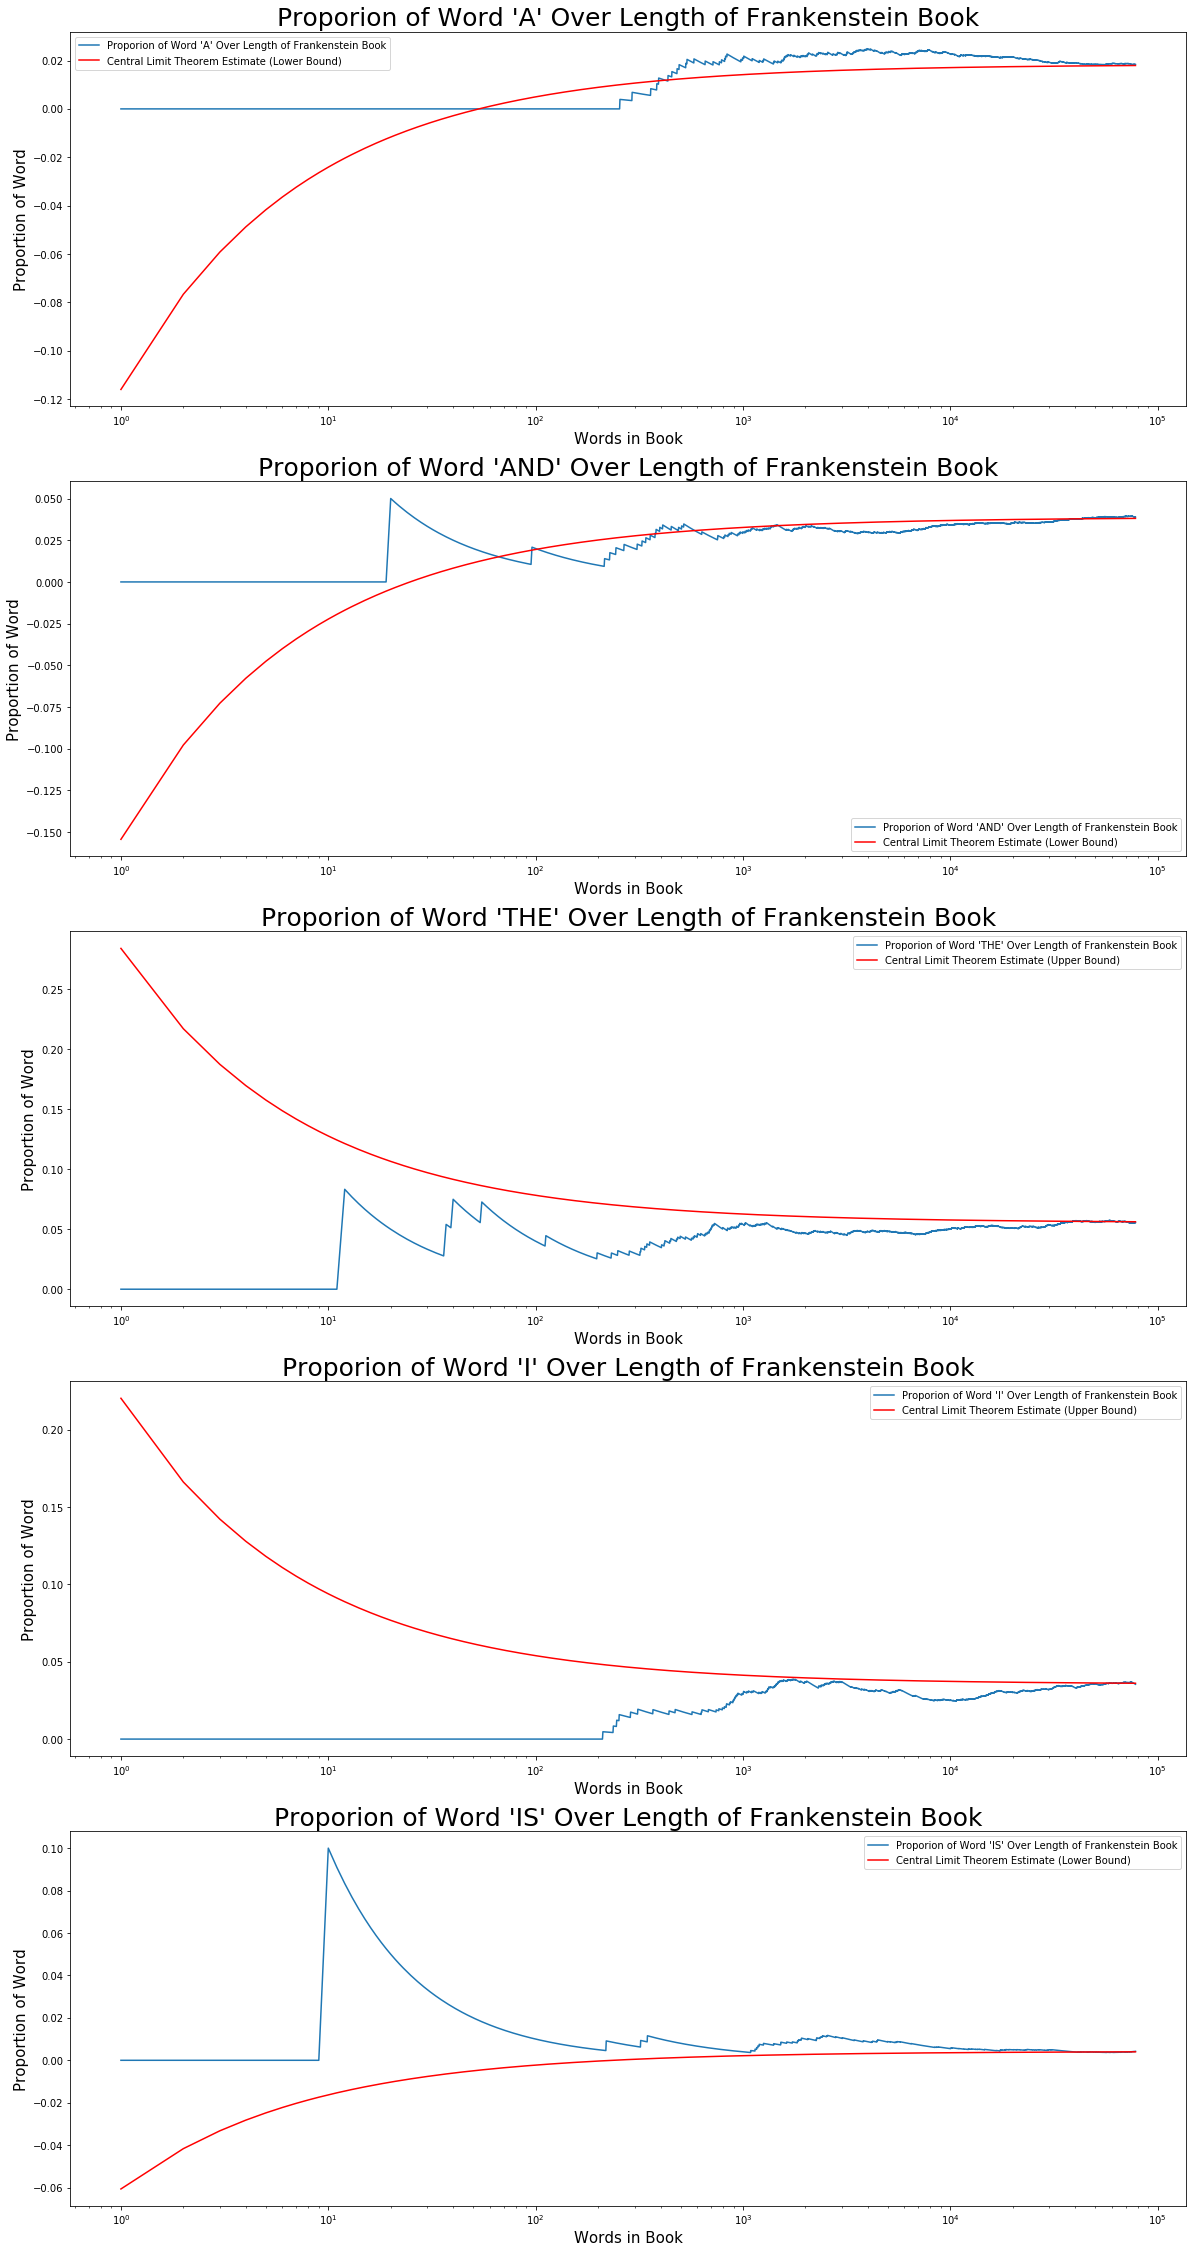

In [89]:
y = bookCumSum

fig, ax = plt.subplots(5, 1, figsize=(20, 40))

means = np.array(means)
variances = means - means**2

word_lists = [testA.asnumpy()/y,
testAND.asnumpy()/y,
testTHE.asnumpy()/y,
testI.asnumpy()/y,
testIS.asnumpy()/y]

labs = ["Proporion of Word 'A' Over Length of Frankenstein Book",
       "Proporion of Word 'AND' Over Length of Frankenstein Book",
       "Proporion of Word 'THE' Over Length of Frankenstein Book",
       "Proporion of Word 'I' Over Length of Frankenstein Book",
       "Proporion of Word 'IS' Over Length of Frankenstein Book",]

for i in range(5):
    ax[i].semilogx(y, word_lists[i])
    if i in [2, 3]:
        ax[i].semilogx(y, (variances[i]**0.5) * np.power(y,-0.5) + means[i],'r')
        ax[i].legend([labs[i], "Central Limit Theorem Estimate (Upper Bound)"])
    else:
        ax[i].semilogx(y, -(variances[i]**0.5) * np.power(y,-0.5) + means[i],'r')
        ax[i].legend([labs[i], "Central Limit Theorem Estimate (Lower Bound)"])
    ax[i].set_title(labs[i], size=25)
    ax[i].set_xlabel("Words in Book", size=15)
    ax[i].set_ylabel("Proportion of Word", size=15)
    

plt.show()



#plt.semilogx(y, (np.var(testA.asnumpy()/bookCumSum)**0.5) * np.power(testA.asnumpy()/bookCumSum,-0.5) 
#             + np.mean(testA.asnumpy()/bookCumSum),'r')


#plt.semilogx(testA.asnumpy()/bookCumSum)
#plt.semilogx(y,-(np.var(testA.asnumpy()/bookCumSum)**0.5) * np.power(testA.asnumpy()/bookCumSum,-0.5) + np.mean(testA.asnumpy()/bookCumSum),'r')
#plt.legend(["Upper Bound", "A Proportion Over Time", "Lower Bound"])

#plt.show()

* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
* Why does it still work quite well?

**ANSWER:** We can't use the Central Limit Theorem (CLT) because each word does not independently appear in the book. The placement of each word is chosen in a very specifc order by the author and thus the probability that a given word appears is generally not equal to the probability that another word appears. Consequently, these probabilities do not all converge to the same point.

We'd have to drastically change the text to apply the CLT. If we made each word appear randomly and independently, in the text, then we would likely be able to apply the CLT. We'd also need to make sure our sample size is sufficiently large, which it appears to be, in this case.

However, it ultimately still works because we have a sufficiently large sample size. Because we have a large sample size, we can see the probabilities converge towards a single point, its probability, and not see the dependency as  much.

## 3. Denominator-layout notation

We used the numerator-layout notation for matrix calculus in class, now let's examine the denominator-layout notation.

Given $x, y\in\mathbb R$, $\mathbf x\in\mathbb R^n$ and $\mathbf y \in \mathbb R^m$, we have

$$
\frac{\partial y}{\partial \mathbf{x}}=\begin{bmatrix}
\frac{\partial y}{\partial x_1}\\
\frac{\partial y}{\partial x_2}\\
\vdots\\
\frac{\partial y}{\partial x_n}
\end{bmatrix},\quad 
\frac{\partial \mathbf y}{\partial {x}}=\begin{bmatrix}
\frac{\partial y_1}{\partial x}, 
\frac{\partial y_2}{\partial x}, 
\ldots,
\frac{\partial y_m}{\partial x}
\end{bmatrix}
$$

and 

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
=\begin{bmatrix}
\frac{\partial \mathbf y}{\partial {x_1}}\\
\frac{\partial \mathbf y}{\partial {x_2}}\\
\vdots\\
\frac{\partial \mathbf y}{\partial {x_3}}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1}, 
\frac{\partial y_2}{\partial x_1},
\ldots,
\frac{\partial y_m}{\partial x_1}
\\ 
\frac{\partial y_1}{\partial x_2},
\frac{\partial y_2}{\partial x_2},
\ldots,
\frac{\partial y_m}{\partial x_2}\\ 
\vdots\\
\frac{\partial y_1}{\partial x_n},
\frac{\partial y_2}{\partial x_n},
\ldots,
\frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

Questions: 

1. Assume $\mathbf  y = f(\mathbf u)$ and $\mathbf u = g(\mathbf x)$, write down the chain rule for $\frac {\partial\mathbf  y}{\partial\mathbf x}$
2. Given $\mathbf X \in \mathbb R^{m\times n},\ \mathbf w \in \mathbb R^n, \ \mathbf y \in \mathbb R^m$, assume $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, compute $\frac{\partial z}{\partial\mathbf w}$.

1.  $\frac {\partial\mathbf  y}{\partial\mathbf x} = \frac {\partial\mathbf  y}{\partial\mathbf u} * \frac {\partial\mathbf  u}{\partial\mathbf x} $  


2. First we examine Z. Since $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, we can say this equals $((x*w) - y)^T((x*w) - y) =\\
((x^T*w^T) - y^T)((x*w) - y) = \\
(w^T*X^T X w) - (w^T*X^T y) - (y^T*X w) + (y^Ty) =\\ 
(w^T*X^T X w) - 2*(y^T*X w) + (y^Ty)$

Then, $ \\ \frac{\partial z}{\partial\mathbf w}((w^T*X^T X w) - 2*(y^T*X w) + (y^Ty)) = \\ 2w^T(X^TX) - 2y^TX = \\ 2w(X^TX) - 2yX^T$

## 4. Numerical Precision

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$.

In [19]:
def log_exp(x, y):
    ## add your solution here
    return -nd.log(nd.exp(x)/(nd.exp(x)+nd.exp(y)))

Test your codes with normal inputs:

In [21]:
x, y = nd.array([2]), nd.array([3])
z = log_exp(x, y)
z


[1.3132617]
<NDArray 1 @cpu(0)>

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [22]:
def grad(forward_func, x, y): 
    ## Add your codes here
    x.attach_grad()
    y.attach_grad()
    with autograd.record():
        z = forward_func(x, y)
    z.backward()
    
    print('x.grad =', x.grad)
    print('y.grad =', y.grad)

Test your codes, it should print the results nicely. 

In [23]:
grad(log_exp, x, y)

x.grad = 
[-0.7310586]
<NDArray 1 @cpu(0)>
y.grad = 
[0.7310586]
<NDArray 1 @cpu(0)>


But now let's try some "hard" inputs

In [24]:
x, y = nd.array([50]), nd.array([100])
grad(log_exp, x, y)

x.grad = 
[nan]
<NDArray 1 @cpu(0)>
y.grad = 
[nan]
<NDArray 1 @cpu(0)>


Does your code return correct results? No.

If not, try to understand the reason. (Hint, evaluate `exp(100)`). 

In [26]:
nd.exp(nd.array([50])), nd.exp(nd.array([100]))

(
 [5.1847055e+21]
 <NDArray 1 @cpu(0)>, 
 [inf]
 <NDArray 1 @cpu(0)>)

It appears those inputs are too big to be treated like this, while 2 and 3 are small and pass through just fine. This gives us a nan value and we can't use an exponent for this!

Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.

In [35]:
def stable_log_exp(x, y):
    ## Add your codes here
    
    if x >= y:
        large = x
        small = y
    else:
        large = y
        small = x
    return large + nd.log(1 + nd.exp(small-large)) - x

# print('x.grad =', x.grad)
# print('y.grad =', y.grad)
    

grad(stable_log_exp, x, y)

x.grad = 
[-1.]
<NDArray 1 @cpu(0)>
y.grad = 
[1.]
<NDArray 1 @cpu(0)>
